In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from test_samples import gaussian_samples, wedding_cake_samples
from lm import generate_theta0, global_live_lm, local_live_lm, estimate_iterations, live_data
from lm import levenberg_marquardt, logL_model
from plots import plot_estimates

In [31]:
def plot_fits(samples, iterations, estimates):
    logLmax_estimates, d_estimates, sigma_estimates = estimates
    if len(iterations) % 3 == 0:
        rows = int(len(iterations)/3)
    else:
        rows = int(len(iterations)/3) + 1
    fig, axs = plt.subplots(rows, 3, figsize=(20,20))
    axs = axs.flatten()
    for i, iteration in enumerate(iterations):
        logLdata, Xdata = live_data(samples, iteration)
        axs[i].plot(Xdata, logLdata, label='real')
        axs[i].plot(Xdata, logL_model((logLmax_estimates[i], d_estimates[i], sigma_estimates[i]), Xdata), label='model')
        axs[i].set_title(f"Iteration {iteration}, d={d_estimates[i]:.2f}, $\sigma$={sigma_estimates[i]:.3f}")
    plt.tight_layout()

In [28]:
from anesthetic import read_chains
plik_root = '../plikHM_TTTEEE_lowl_lowE_lensing_NS/NS_plikHM_TTTEEE_lowl_lowE_lensing'
samples_plik = read_chains(root=plik_root)

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/samples.py:971: RuntimeWarning: 7 out of 60705 samples have logL <= logL_birth,
7 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


### Gaussian without bootstrapping

In [2]:
samples_g = gaussian_samples(500, 15, 0.001)

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [3]:
iterations_g = np.arange(500, 20000, 1000)
logLmax_g, d_g, sigma_g = estimate_iterations(samples_g, global_live_lm, iterations_g, (generate_theta0, 5))

500
0 [0.5, 1, 0.001] [5.05630315e+02 2.29798362e+01 9.54734746e-03] 9653.468186138247


/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1 [-999.5, 2, 0.101] [5.09950609e+02 2.29966672e+01 9.54347817e-03] 9652.535429734731
2 [-1999.5, 3, 0.201] [5.10235427e+02 2.29950562e+01 9.54313017e-03] 9656.091481523234
3 [-2999.5, 4, 0.30100000000000005] [5.09330872e+02 2.30000000e+01 9.54422955e-03] 9649.0766534109
4 [-3999.5, 5, 0.401] [5.09591484e+02 2.29986122e+01 9.54391402e-03] 9649.85032090056
1500
0 [0.5, 1, 0.001] [-3.12493524e+02  1.76384872e+01  1.02064939e-02] 4262.49478384806
1 [-999.5, 2, 0.101] [-3.12493442e+02  1.76384877e+01  1.02064938e-02] 4262.494783847994
2 [-1999.5, 3, 0.201] [-3.12493314e+02  1.76384885e+01  1.02064937e-02] 4262.494783848354
3 [-2999.5, 4, 0.30100000000000005] [-3.12493347e+02  1.76384883e+01  1.02064937e-02] 4262.494783848201
4 [-3999.5, 5, 0.401] [-3.12493503e+02  1.76384873e+01  1.02064939e-02] 4262.494783848008
2500
0 [0.5, 1, 0.001] [-3.25957006e+02  1.75795835e+01  1.02218906e-02] 8220.826329691252
1 [-999.5, 2, 0.101] [-3.25956687e+02  1.75795861e+01  1.02218904e-02] 8220.826329691767

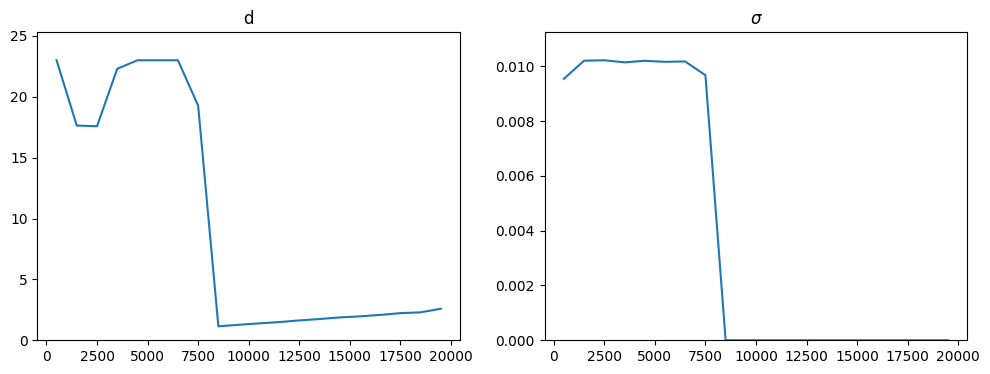

In [4]:
plot_estimates(iterations_g, d_g, sigma_g)

In [6]:
local_live_lm(samples_g, 10000).x

array([-6.31846738e+02,  1.00000000e+00,  9.99997295e-04])

In [5]:
# Minimise with respect to all data that has come before
def bootstrapped_live_lm(samples, iteration, straps):
    iterations = np.linspace(0, iteration, straps)
    logLdata_full = []
    Xdata_full = []
    for i in iterations:
        logLdata, Xdata = live_data(samples, int(i))
        logLdata_full.append(logLdata)
        Xdata_full.append(Xdata)
    logLdata_full = np.array(logLdata_full).flatten()
    Xdata_full = np.array(Xdata_full).flatten()
    solution = levenberg_marquardt(logLdata_full, Xdata_full, [-10000, 1, 0.001])
    return solution

### Gaussian with bootstrapping

In [29]:
iterations_g = np.arange(500, 40000, 1000)

In [28]:
estimates_g = estimate_iterations(samples_g, bootstrapped_live_lm, iterations_g, [5])

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Iteration 500 complete
Iteration 1500 complete
Iteration 2500 complete
Iteration 3500 complete
Iteration 4500 complete
Iteration 5500 complete
Iteration 6500 complete
Iteration 7500 complete
Iteration 8500 complete
Iteration 9500 complete
Iteration 10500 complete
Iteration 11500 complete
Iteration 12500 complete
Iteration 13500 complete
Iteration 14500 complete
Iteration 15500 complete
Iteration 16500 complete
Iteration 17500 complete
Iteration 18500 complete
Iteration 19500 complete
Iteration 20500 complete
Iteration 21500 complete
Iteration 22500 complete
Iteration 23500 complete
Iteration 24500 complete
Iteration 25500 complete
Iteration 26500 complete
Iteration 27500 complete
Iteration 28500 complete
Iteration 29500 complete
Iteration 30500 complete
Iteration 31500 complete
Iteration 32500 complete
Iteration 33500 complete
Iteration 34500 complete
Iteration 35500 complete
Iteration 36500 complete
Iteration 37500 complete
Iteration 38500 complete
Iteration 39500 complete


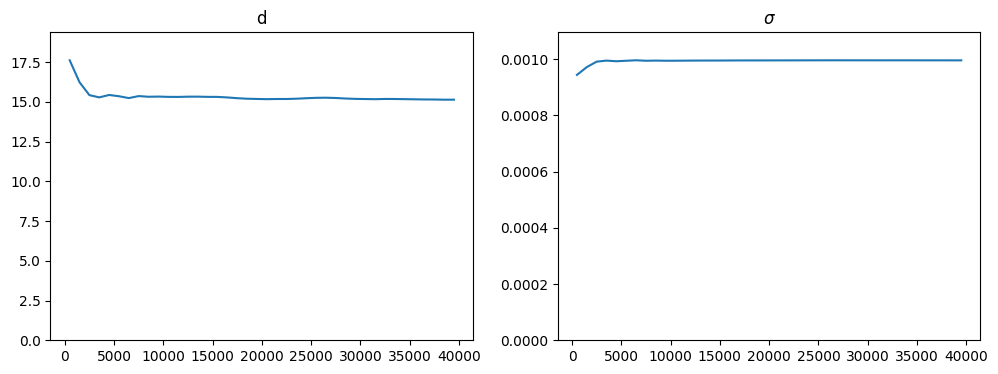

In [30]:
plot_estimates(iterations_g, d_g, sigma_g)

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


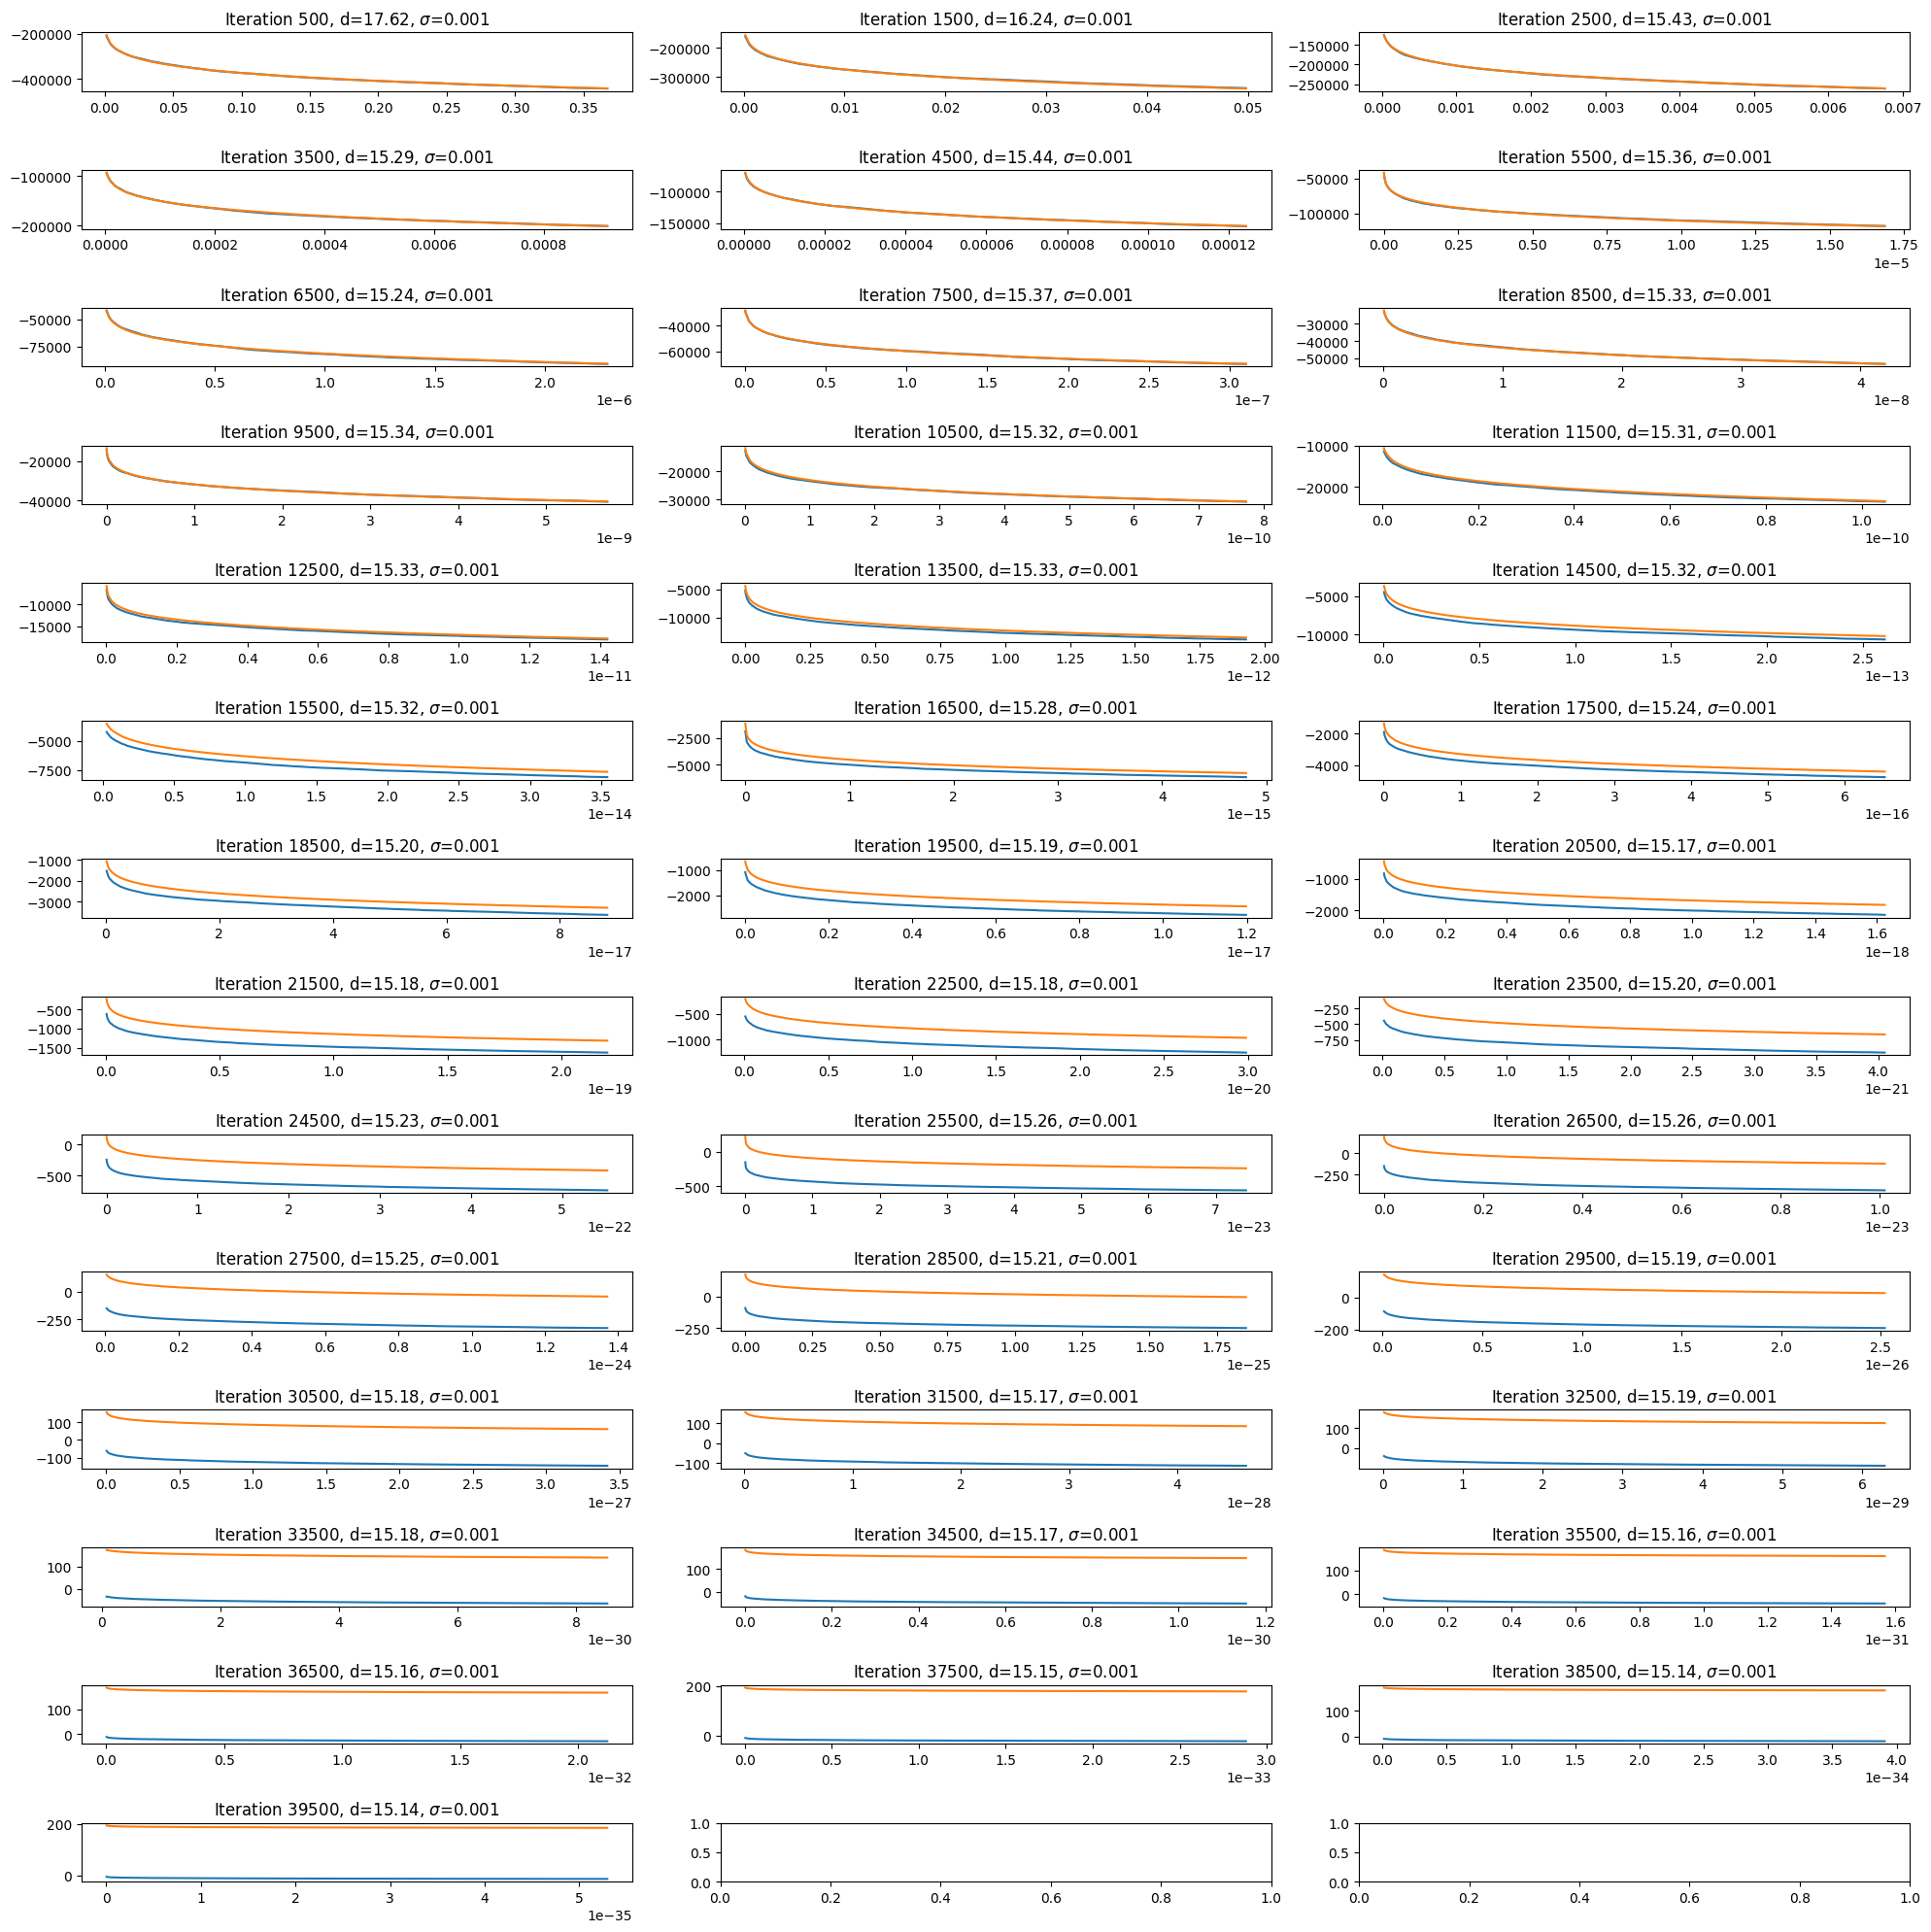

In [32]:
plot_fits(samples_g, iterations_g, estimates_g)

### Wedding cake

In [11]:
samples_w = wedding_cake_samples(1000, 10, 0.01)

In [14]:
iterations_w = np.arange(200, 8000, 400)

In [24]:
estimates_w = estimate_iterations(samples_w, bootstrapped_live_lm, iterations_w, [5])

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Iteration 200 complete
Iteration 600 complete
Iteration 1000 complete
Iteration 1400 complete
Iteration 1800 complete
Iteration 2200 complete
Iteration 2600 complete
Iteration 3000 complete
Iteration 3400 complete
Iteration 3800 complete
Iteration 4200 complete
Iteration 4600 complete
Iteration 5000 complete
Iteration 5400 complete
Iteration 5800 complete
Iteration 6200 complete
Iteration 6600 complete
Iteration 7000 complete
Iteration 7400 complete
Iteration 7800 complete


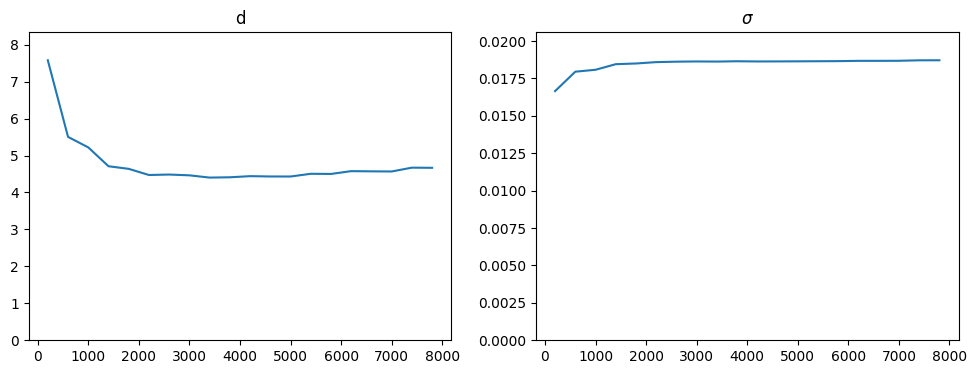

In [16]:
plot_estimates(iterations_w, d_w, sigma_w)

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


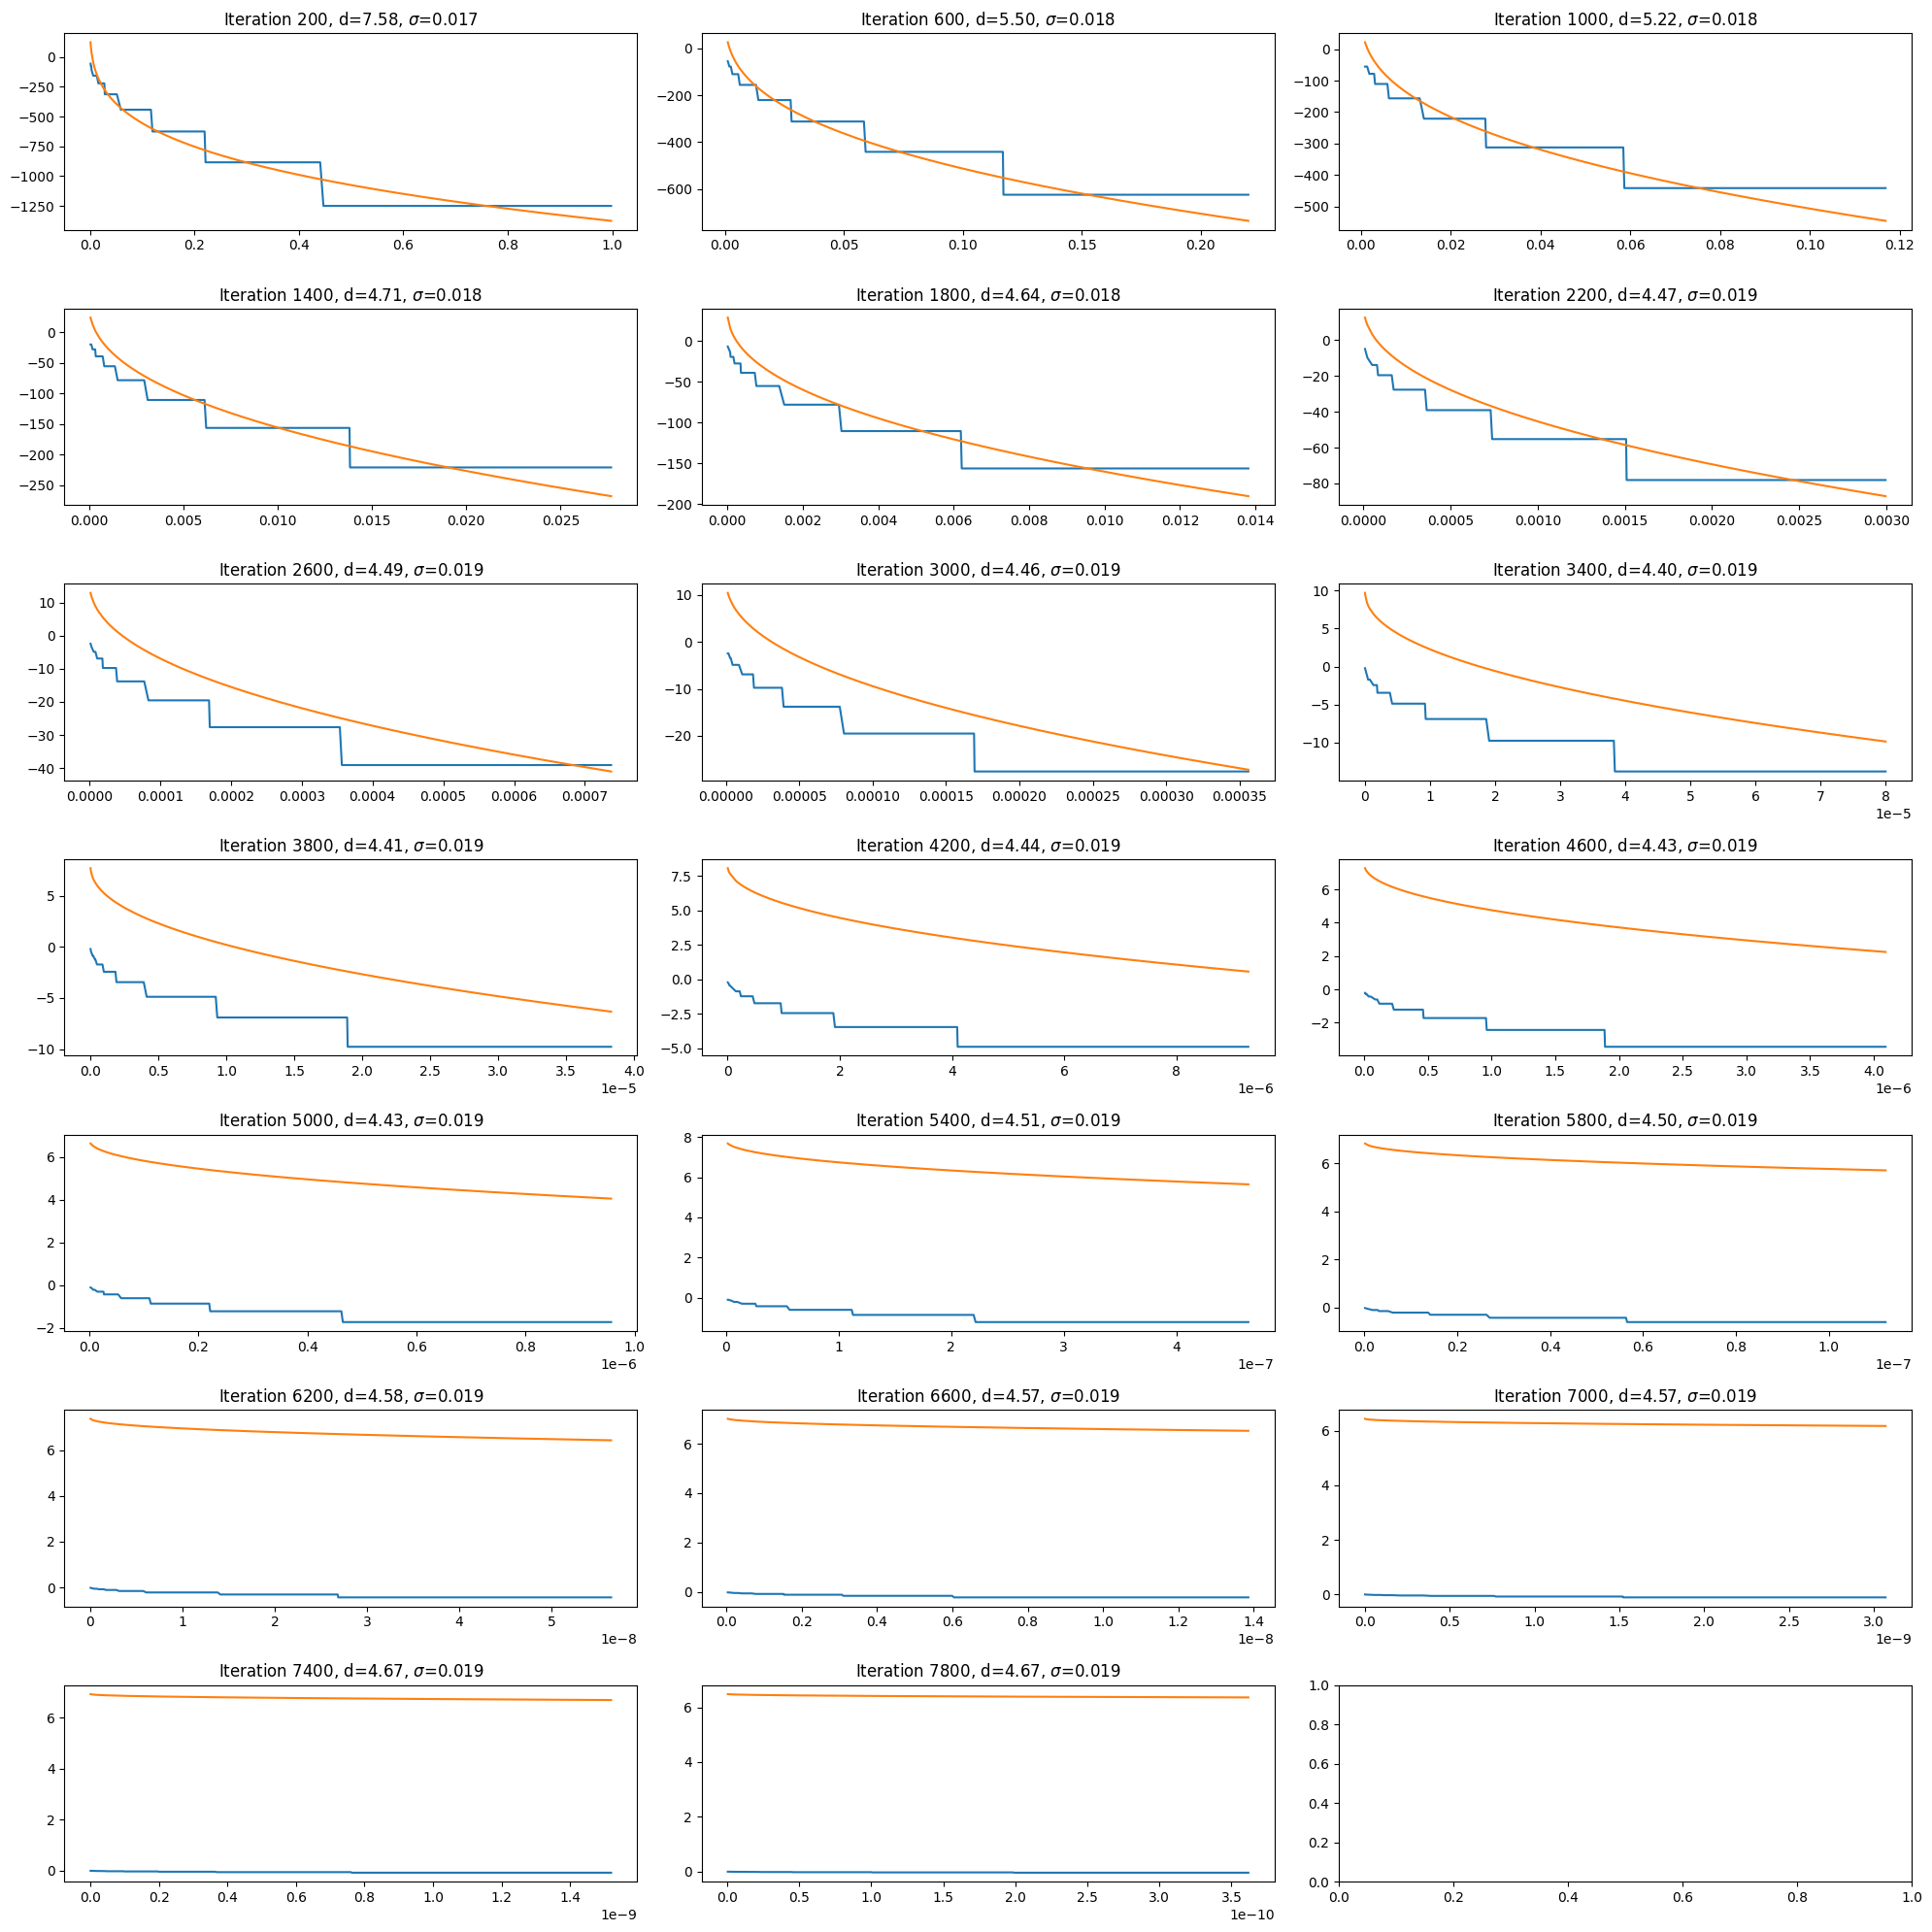

In [26]:
plot_fits(samples_w, iterations_w, estimates_w)